In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("movies.csv")
print(df.head())

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df['industry'].unique()

In [ ]:
df['industry'].value_counts()

In [ ]:
df[(df['release_year'] >= 2014) & (df['release_year'] <= 2015)]

In [ ]:
df['studio'].unique()

In [ ]:
df[(df['release_year'] >= 2014) & (df['release_year'] <= 2015)][df['studio']=='Marvel Studios']

In [ ]:
df.describe()

In [ ]:
df.describe().transpose()

In [ ]:
df.info()

In [ ]:
import datetime as dt
dt.datetime.now().year

In [ ]:
import datetime as dt
df['age'] = df['release_year'].apply(lambda x : dt.datetime.now().year - x)
print(df.head())

In [ ]:
df['Profit'] = df['revenue']-df['budget']
print(df.head(1))

In [ ]:
df.set_index("title",inplace=True)
df.head(3)

In [ ]:
df.index

In [ ]:
df.loc['Baahubali: The Beginning']['revenue']

In [ ]:
df.iloc[0][0]

Excel read and write

In [ ]:
df_st = pd.read_csv("stock_data.csv",header=1,names=['stocks', 'eps', 'revenue', 'price', 'people'])
print(df_st.columns)
print(df_st)

In [ ]:
df_st = pd.read_csv("stock_data.csv",header=1,names=['stocks', 'eps', 'revenue', 'price', 'people'],na_values={
    'eps': ['not available',-1],
    'revenue':[-1],
    'price':['n.a.'],
    'people':['n.a.']
})
print(df_st.columns)
print(df_st)

In [ ]:
df_st['pe'] =df_st['revenue']/df_st['eps']
print(df_st)

In [ ]:
df_st.to_csv("pe.csv",index=False)

In [ ]:
df_movie = pd.read_excel("movies_db.xlsx",sheet_name="movies")
print(df_movie.head())

In [ ]:
def df_currecy(curr):
    if(curr == '$$' or curr == 'Dollars' ):
        return "USD"
    return curr

df_financial = pd.read_excel("movies_db.xlsx",sheet_name="financials",converters={
    'currency':df_currecy
})
print(df_financial.head())

In [ ]:
df_movie_fin_merge = pd.merge(df_movie,df_financial,on='movie_id',how='inner')
print(df_movie_fin_merge.head())

In [ ]:
df_movie_fin_merge.to_excel("movie_fin_merge.xlsx",sheet_name="merge",index=False)

In [ ]:
with pd.ExcelWriter("All_In_Once.xlsx") as write:
    df_movie_fin_merge.to_excel(write,sheet_name="movie_fin_merge")
    df_financial.to_excel(write,sheet_name="financial")

Handle NA Values

In [ ]:
df_weather = pd.read_csv('weather_data.csv',parse_dates=['day'])
print(df_weather)

In [ ]:
df_weather.set_index('day')

In [ ]:
df_weather.dropna(how='all',axis=1,inplace=True)

In [ ]:
print(df_weather)

In [ ]:
df_weather.fillna(0)

In [ ]:
df_weather.fillna({
    'temperature': df_weather['temperature'].mean(),
    'windspeed': df_weather['windspeed'].median(),
    'event': 'No Event'
},inplace=True)

In [ ]:
df_weather.fillna(method='ffill')

In [ ]:
import numpy as np
df_weather.replace({
    'event' :'No Event'
},np.nan)

In [ ]:
g = df_movie.groupby('industry')

In [ ]:
for ind,data in g:
    print(ind)
    print(data.imdb_rating.max())

In [ ]:
g.get_group('Bollywood')

In [59]:
g.size()
df_movie['imdb_rating'].value_counts()

imdb_rating
8.4    5
8.1    4
8.0    4
8.3    3
8.5    2
9.0    2
7.8    2
8.6    2
7.9    2
6.8    2
9.3    1
8.8    1
7.0    1
7.2    1
7.4    1
9.2    1
8.2    1
7.6    1
6.9    1
1.9    1
Name: count, dtype: int64

In [ ]:
def grooper(data,idx,col):
    if 8.1 <= data[col].loc[idx] <= 8.4:
        return "Good"
    return "Bad"
g1 = df_movie.groupby(lambda idx:grooper(df_movie,idx,"imdb_rating"))

Merge and Concate

In [60]:
df_name_age_1 = pd.DataFrame({
    'Name': ['Prabhu','Navin'],
    'age':[24,20]
})
df_name_age_1

,Name,age
0,Prabhu,24
1,Navin,20


In [61]:
df_name_age_2 = pd.DataFrame({
    'Name': ['Prabhu','Navin'],
    'age':[24,20]
})
df_name_age_2

,Name,age
0,Prabhu,24
1,Navin,20


In [68]:
df_concate_name = pd.concat([df_name_age_1,df_name_age_2],ignore_index=True)
df_concate_name

,Name,age
0,Prabhu,24
1,Navin,20
2,Prabhu,24
3,Navin,20


In [69]:
df_concate_name = pd.concat([df_name_age_1,df_name_age_2],keys=['Ind','US'])
df_concate_name

Name  age
Ind 0  Prabhu   24
    1   Navin   20
US  0  Prabhu   24
    1   Navin   20

In [70]:
df_concate_name.loc['Ind']

,Name,age
0,Prabhu,24
1,Navin,20


In [72]:
df_temp = pd.DataFrame({
    'city':['cbe','blr','dubai'],
    'tem' : [30,40,50]
},index=[0,1,2])
print(df_temp)
df_wind = pd.DataFrame({
    'city':['dubai','blr'],
    'win' : [30,40]
},index=[2,1])
print(df_wind)

    city  tem
0    cbe   30
1    blr   40
2  dubai   50
    city  win
2  dubai   30
1    blr   40


In [74]:
df_wind_temp_con = pd.concat([df_wind,df_temp],axis=1)
df_wind_temp_con

,city,win,city,tem
2,dubai,30.0,dubai,50
1,blr,40.0,blr,40
0,NaN,NaN,cbe,30


In [82]:
df_temp = pd.DataFrame({
    'city':['cbe','blr','dubai'],
    'tem' : [30,40,50]
})
df_wind = pd.DataFrame({
    'city':['dubai','blr'],
    'win' : [30,40]
})

df_wind_temp_merge = pd.merge(df_temp,df_wind,on='city',how='left')
df_wind_temp_merge

,city,tem,win
0,cbe,30,NaN
1,blr,40,40.0
2,dubai,50,30.0


<Axes: ylabel='studio'>

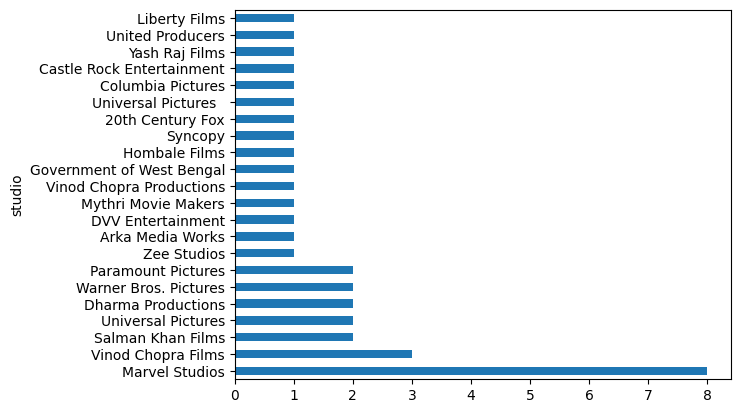

In [87]:
df_movie['studio'].value_counts().plot(kind='barh')